In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [57]:
winter_df = pd.read_csv("winter-semester.csv")
summer_df = pd.read_csv("summer-semester.csv")
ects = pd.read_csv("ects.csv")

winter_df.head()

,Date,Start,End,Subject,Action
0,28.9.2020.,12:00,14:00,INZEKO1,lesson
1,28.9.2020.,16:00,19:00,OPRPP1,lesson
2,29.9.2020.,13:00,16:00,PI,lesson
3,29.9.2020.,16:00,19:00,SAP,lesson
4,30.9.2020.,09:00,10:00,PPJ,lesson


In [58]:
def transform_datasets(_winter_df: pd.DataFrame, _summer_df: pd.DataFrame) -> pd.DataFrame:
    _winter_df['Semester'] = 'W'
    _summer_df['Semester'] = 'S'
    _df = pd.concat([_winter_df, _summer_df], axis=0)

    _df['Start'] = pd.to_datetime(_df['Date'] + " " + _df['Start'])
    _df['End'] = pd.to_datetime(_df['Date'] + " " + _df['End'])
    _df.insert(3, 'Duration [hrs]', (_df['End'] - _df['Start']) / pd.Timedelta(hours=1))
    return _df

In [59]:
df = transform_datasets(winter_df, summer_df)
df.head()

,Date,Start,End,Duration [hrs],Subject,Action,Semester
0,28.9.2020.,2020-09-28 12:00:00,2020-09-28 14:00:00,2.0,INZEKO1,lesson,W
1,28.9.2020.,2020-09-28 16:00:00,2020-09-28 19:00:00,3.0,OPRPP1,lesson,W
2,29.9.2020.,2020-09-29 13:00:00,2020-09-29 16:00:00,3.0,PI,lesson,W
3,29.9.2020.,2020-09-29 16:00:00,2020-09-29 19:00:00,3.0,SAP,lesson,W
4,30.9.2020.,2020-09-30 09:00:00,2020-09-30 10:00:00,1.0,PPJ,lesson,W


## Total duration spent per subject

In [60]:
dur_df = df[['Subject', 'Duration [hrs]']].groupby(['Subject']).sum()
dur_df = dur_df.join(other=ects.set_index('Subject'), how='inner')
dur_df = dur_df.sort_values(by=['ECTS', 'Duration [hrs]'], ascending=False)

dur_df['Min exp duration [hrs]'] = dur_df['ECTS'] * 25
dur_df['Max exp duration [hrs]'] = dur_df['ECTS'] * 30

dur_df

,Duration [hrs],ECTS,Min exp duration [hrs],Max exp duration [hrs]
Subject,,,,
BA_THESIS,109.500000,10,250,300
BA_PROJECT,24.916667,8,200,240
OPRPP1,161.416667,5,125,150
PI,139.250000,5,125,150
SAP,104.166667,5,125,150
OOUP,91.000000,5,125,150
PPJ,60.833333,5,125,150
BIOINF,10.000000,5,125,150
UUI,86.500000,4,100,120


In [84]:
dur_df['Duration [hrs]']['BA_THESIS']

109.5

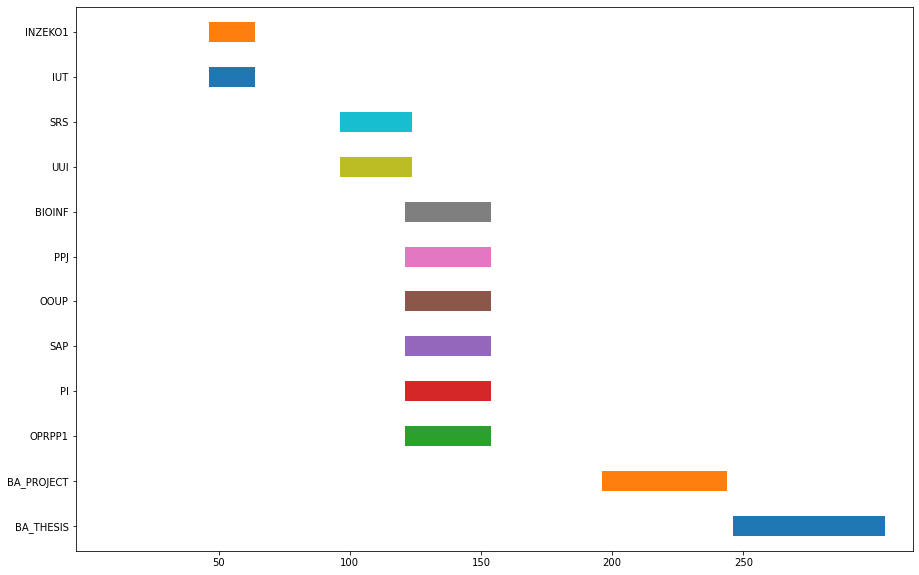

In [92]:
plt.figure(figsize=(15,10))
subjects = dur_df.index.to_numpy()

plt.yticks(range(len(subjects)), subjects)
plt.xticks(range(50, 300, 50))

for idx, subject in enumerate(subjects):
    plt.plot([dur_df['Min exp duration [hrs]'][subject], dur_df['Max exp duration [hrs]'][subject]], [idx, idx], lw=20)
    plt.plot([dur_df['Duration [hrs]'][subject], dur_df['Duration [hrs]'][subject]], [idx, idx], 'k-', lw=20)



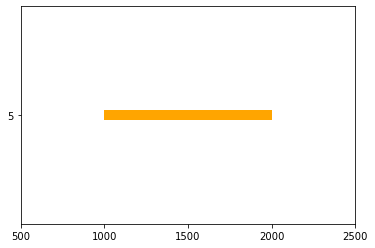

In [64]:
plt.plot([1000, 2000], [5, 5], lw=10, color="orange", solid_capstyle="butt")#Setting capstyle to butt, because otherwise the length of the line is slightly longer, than required
plt.yticks(range(10))
plt.xticks(range(500, 3000, 500))
plt.margins(0.5)
plt.show()